### Documentación

Problemas interesantes para Aprendizaje por refuerzo
 * Gymnasium: https://gymnasium.farama.org/environments/box2d/

## Instalación

!pip install gymnasium  
!pip install gymnasium[box2d] 

## Acciones adicionales

### En macos

pip uninstall swig  
xcode-select -—install (si no se tienen ya)  
pip install swig  / sudo port install swig-python
pip install 'gymnasium[box2d]' # en zsh hay que poner las comillas  

### en Windows

Si da error, se debe a la falta de la versión correcta de Microsoft Visual C++ Build Tools, que es una dependencia de Box2D. Para solucionar este problema, puede seguir los siguientes pasos:  
 * Descargar Microsoft Visual C++ Build Tools desde https://visualstudio.microsoft.com/visual-cpp-build-tools/.
 * Dentro de la app, seleccione la opción "Herramientas de compilación de C++" para instalar.
 * Reinicie su sesión en Jupyter Notebook.
 * Ejecute nuevamente el comando !pip install gymnasium[box2d] en la línea de comandos de su notebook.

In [ ]:
# prueba lunar lander por humano

import gymnasium as gym

env = gym.make("LunarLander-v2", render_mode="rgb_array")

import numpy as np
import pygame
import gymnasium.utils.play

lunar_lander_keys = {
    (pygame.K_UP,): 2,
    (pygame.K_LEFT,): 1,
    (pygame.K_RIGHT,): 3,
}
gymnasium.utils.play.play(env, zoom=3, keys_to_action=lunar_lander_keys, noop=0)

### Genetic Algorithm

Generación 0 Fitness -130.99942567258773
Mejor fitness:  -109.09333801232216  Cromosoma:  [-1.3405185639305741, 2.29437470593982, 0.8419328505247625, -0.9554446334631121, -2.1699069623838465, 2.6634244644629197, 1.6262114002655466, -2.78033061164889, 1.1627986011488716, -2.4200206183067716, -2.699606901477257, 2.3878484969773552, -2.996697041108515, -2.5670870782703332, -1.8222482512555593, -1.7829046566943993, -2.903828578340367, -1.1264129464220258, 2.0929485726224133, 2.07388053690796, 1.3647090458970723, -1.167260974873071, 0.1729251050739049, 1.5822163813693626, 0.7043383498655693, -2.391380936812821, 0.7896032832225344, 2.122555155474254, -1.9392434156780272, -0.4529523712063903, -0.5716220493698545, -1.518671281234426, -0.10789652284580953, -2.0207682220150978, -0.8524327737011053, -1.9389006001439015, 2.7913131937682047, 1.4585276487454157, 1.7279630525850438, -0.013889966238065377, -0.7285808027180769, 0.33500543079721634, 2.5028714721980574, 0.1759578693232271, 1.745376248158

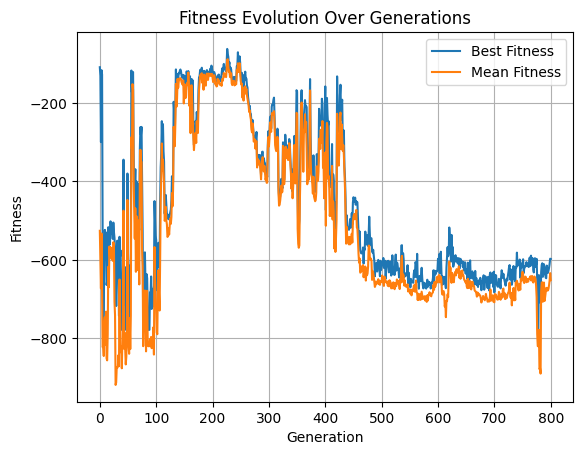

In [1]:
from GA import Genetic_Algorithm

GA = Genetic_Algorithm(N=50, crossover_method=1, pcross=0.5, pmut=3/82, sigma=0.2, selection=1, n_tour=2, temp=1, n_iter=800, elitism=0, num_exp=30, bounds=[-20, 20])
chromosome, fitness = GA.evolve()

### Test best result of GA

In [ ]:
chromosome = [-5.1557750797652355, -7.980841742847936, -13.163908631368175, -3.7457309819000195, -8.18898413840871, -4.872006813596256, 13.991734931310354, -8.356878946457561, 8.38089353366159, 6.078935817191149, -9.487176681508071, 3.029574157970837, -13.820013892079945, -10.006371949751829, -11.216150583249334, -0.6590412635596098, -0.8315393670344533, -4.116855203639449, 3.1647444175241475, -0.8735228934970257, 2.5629252115160215, 7.931768054124031, -9.933120701796021, 6.2203459228961275, -1.6504193744167428, -3.3407521515035468, -3.8958760575609817, -0.11988148170118623, 0.6746965115662906, 3.3678316885261985, 10.315084749184617, 6.723320494495934, -6.017050974048589, 0.26124708130640284, 14.367420733360625, 7.739783436607821, 0.45398462638793796, -1.2797265398008815, -4.310356822602239, -0.7057149276846835, 7.905378315256625, -9.877879356120989, 15.91713636133181, 5.386944564550635, -3.462766914836761, 7.705603019251466, -4.952930250219165, 4.2987471689882355, 1.649741701143725, -4.046242351659431, -1.3619661766784603, 2.6486541165533617, 8.671259406147879, 12.927455987073701, -6.601154262362282, -11.139166678250085, 1.1503658860775783, -13.279556849970124, 4.845557595614942, -6.790825056611087, 11.608359907566719, 11.244917721387866, -5.061570439374675, -9.437455030858743, -1.932178536368972, -4.16771989851538, -4.9936099976462565, -1.8068451025788548, 3.8966980452321742, 6.816712963071394, 1.991974541804312, 13.400839064918687, 4.6136942954593865, 7.2389641896429175, 4.285791677477841, 7.521949330603041, 4.039725210851329, -6.1825100995238405, 7.1642549690913935, 4.779652342278313, -3.612127037879377, -6.644734917508778]

model = MLP([8, 6, 4])

model.from_chromosome(chromosome)

# definir política
def policy (observation):
    s = model.forward(observation)
    action = np.argmax(s)
    return action

# prueba lunar lander por agente

import gymnasium as gym

env = gym.make("LunarLander-v2", render_mode="human")

def run ():
    #observation, info = env.reset(seed=42)
    observation, info = env.reset()
    ite = 0
    racum = 0
    while True:
        action = policy(observation)
        observation, reward, terminated, truncated, info = env.step(action)
        
        racum += reward

        if terminated or truncated:
            r = (racum+200) / 500
            print(racum, r)
            return racum

In [ ]:
while True:
    run()

#### ¿No has tenido bastante?

Prueba a controlar el flappy bird https://github.com/markub3327/flappy-bird-gymnasium

pip install flappy-bird-gymnasium

import flappy_bird_gymnasium  
env = gym.make("FlappyBird-v0")

Estado (12 variables):
  * the last pipe's horizontal position
  * the last top pipe's vertical position
  * the last bottom pipe's vertical position
  * the next pipe's horizontal position
  * the next top pipe's vertical position
  * he next bottom pipe's vertical position
  * the next next pipe's horizontal position
  * the next next top pipe's vertical position
  * the next next bottom pipe's vertical position
  * player's vertical position
  * player's vertical velocity
  * player's rotation

  Acciones:
  * 0 -> no hacer nada
  * 1 -> volar

In [ ]:
len(MLP([8, 6, 4]).to_chromosome())